# 2. 지도학습

### 기본 패키지 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import mglearn
%matplotlib inline

In [2]:
from scipy import sparse
from sklearn.model_selection import train_test_split

### matplotlib 한글 설정

In [3]:
import matplotlib as mpl
from matplotlib import font_manager, rc

In [4]:
# matplotlib 한글 폰트 설정
# font_name = font_manager.FontProperties(fname="/Users/alex/Library/Fonts/D2Coding-Ver1.3.2-20180524.ttf").get_name()
# rc('font', family=font_name)
plt.rcParams["font.size"] = 12

In [5]:
# plot 크기
plt.rcParams["figure.figsize"] = (14,4)

## 2.3.1 지도학습에 사용할 데이터셋

### 이진 분류

X.shape : (26, 2)


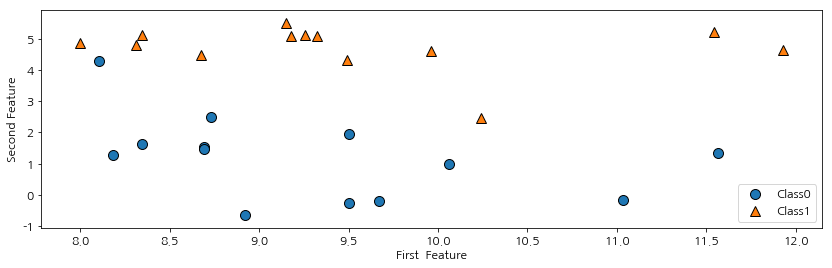

In [6]:
# forge 데이터셋
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class0", "Class1"], loc=4)
plt.xlabel("First  Feature")
plt.ylabel("Second Feature")
print("X.shape : {}".format(X.shape))

In [7]:
# 위스콘신 유방암 데이터셋
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
cancer.data.shape

(569, 30)

In [9]:
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}

{'malignant': 212, 'benign': 357}

In [10]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### 회귀 알고리즘

(40, 1)

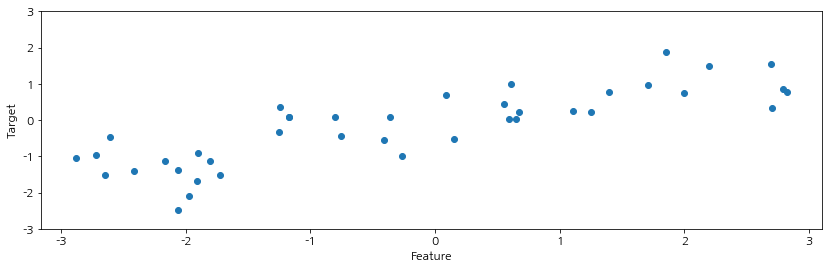

In [11]:
# wave 데이터셋
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")
X.shape

In [12]:
# 보스턴 주택가격 데이터셋
from sklearn.datasets import load_boston
boston = load_boston()
boston.data.shape

(506, 13)

In [13]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [14]:
X, y = mglearn.datasets.load_extended_boston()
X.shape

(506, 104)

## 2.3.2 k-최근접 이웃

### k-최근접 이웃 분류

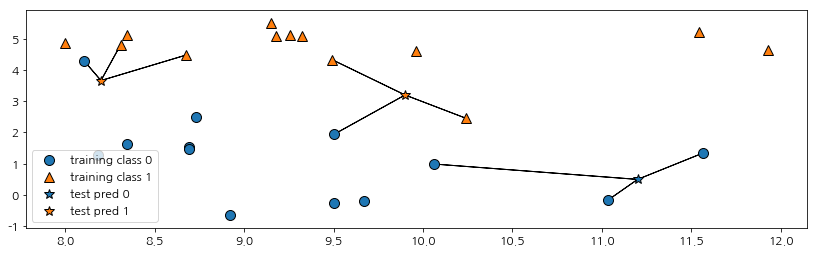

In [15]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [16]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=0)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [18]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [19]:
# array를 DataFrame으로 변환하는 예시(index, column name 자동 생성)
X_train_df = pd.DataFrame(data=X_train[:, :],    # values : if 1st column/row as index/names, values are X_train[1:,1:]
                                            index=X_train[0:,0],    # if 1st column as index, X_train[1:, 0]
                                            columns=X_train[0,0:])  # if 1st row as the column names, X_train[0, 1:]
display(X_train_df.head())

,8.922295260246623,-0.6399322515976771
8.922295,8.922295,-0.639932
8.733709,8.733709,2.491624
9.322983,9.322983,5.098406
7.998153,7.998153,4.852505
11.032954,11.032954,-0.168167


In [20]:
print("테스트 세트 예측: {}".format(clf.predict(X_test)))
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

print(clf.predict(np.array([[8.0, 3.5]])))

테스트 세트 예측: [1 0 1 0 1 0 0]
테스트 세트 정확도: 0.86
[0]


1-neighbor 테스트 세트 정확도: 1.00
3-neighbor 테스트 세트 정확도: 0.86
9-neighbor 테스트 세트 정확도: 0.86


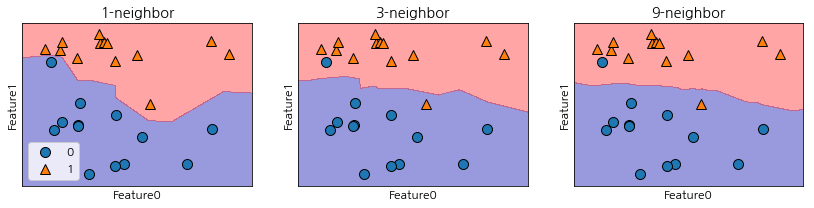

In [21]:
# KNeighborsClassifier 분석
fig, axes = plt.subplots(1, 3, figsize=(14,3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:, 1], y, ax=ax)
    ax.set_title("{}-neighbor".format(n_neighbors))
    ax.set_xlabel("Feature0")
    ax.set_ylabel("Feature1")
    print(str(n_neighbors) + "-neighbor 테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))
axes[0].legend(loc=3)

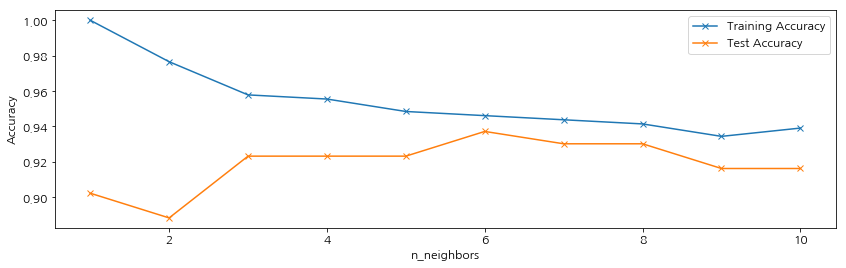

In [22]:
# n_neighbors 변화에 따른 훈련 정확도와 테스트 정확도 분석(과대적합 vs. 과소적합)
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy", marker="x")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy", marker="x")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### k-최근접 이웃 회귀

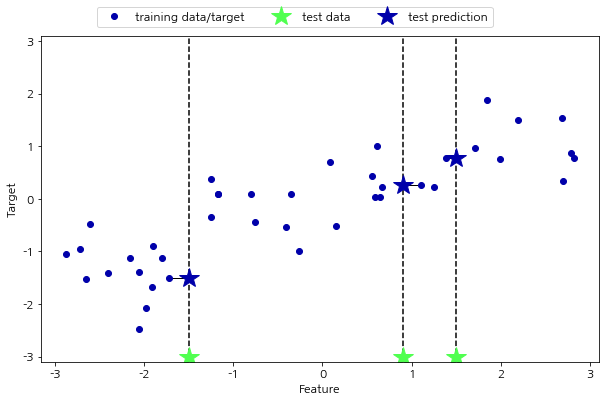

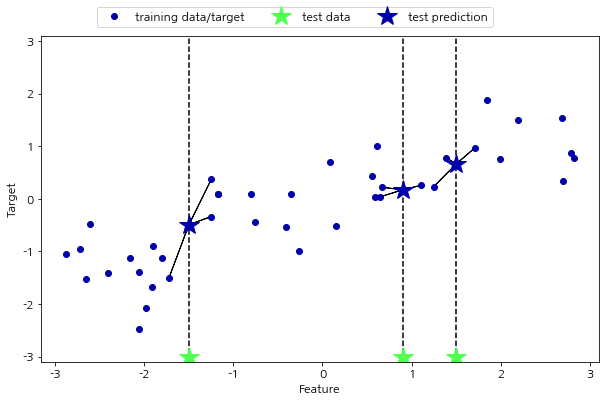

In [23]:
mglearn.plots.plot_knn_regression(n_neighbors=1)
mglearn.plots.plot_knn_regression(n_neighbors=3)
# test 데이터 : X_test = np.array([[-1.5], [0.9], [1.5]])

In [24]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [25]:
print("테스트 세트 예측: \n{}".format(reg.predict(X_test)))

테스트 세트 예측: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [26]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


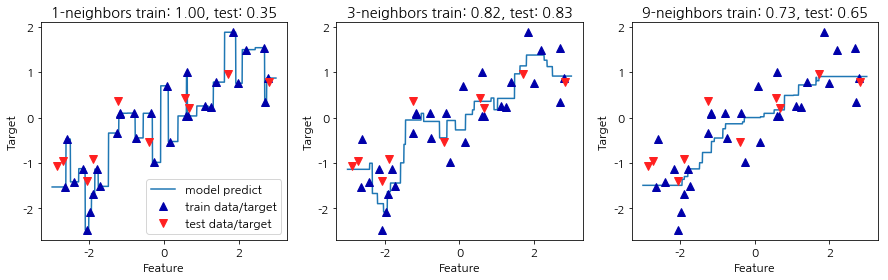

In [27]:
# KNeighborsRegressor 분석
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{}-neighbors train: {:.2f}, test: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["model predict", "train data/target", "test data/target"], loc="best")

## 2.3.3 선형 모델
입력 특성에 대한 선형 함수를 만들어 예측을 수행합니다.

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


w[0]: 0.393906  b: -0.031804


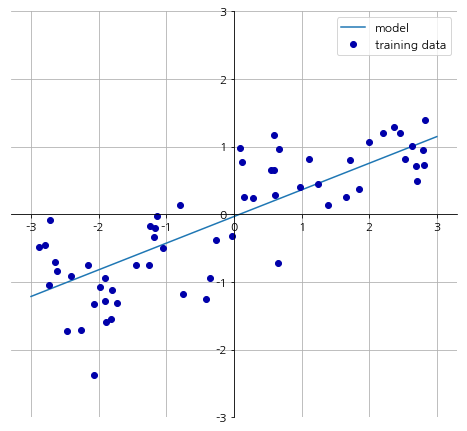

In [28]:
mglearn.plots.plot_linear_regression_wave()

### 선형회귀(최소제곱법)

In [29]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [30]:
print("w: lr.coef_: {}".format(lr.coef_))
print("b: lr.intercept_: {}".format(lr.intercept_))

w: lr.coef_: [0.39390555]
b: lr.intercept_: -0.031804343026759746


In [31]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [32]:
# 보스턴 주택가격 데이터셋
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [33]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


### 릿지 회귀

In [34]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)     # alpha = 1
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [35]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [36]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


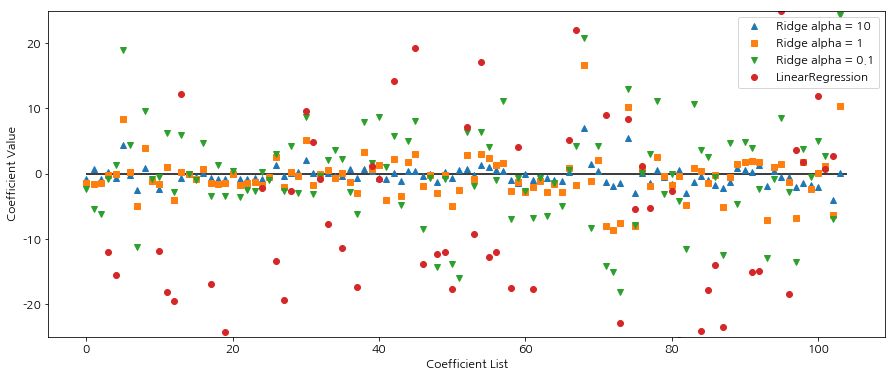

In [37]:
# alpha 값에 따른 모델의 coef_ 속성 변화
plt.figure(figsize=(15, 6))
plt.plot(ridge10.coef_, '^', label="Ridge alpha = 10")
plt.plot(ridge.coef_, 's', label="Ridge alpha = 1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha = 0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient List")
plt.ylabel("Coefficient Value")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

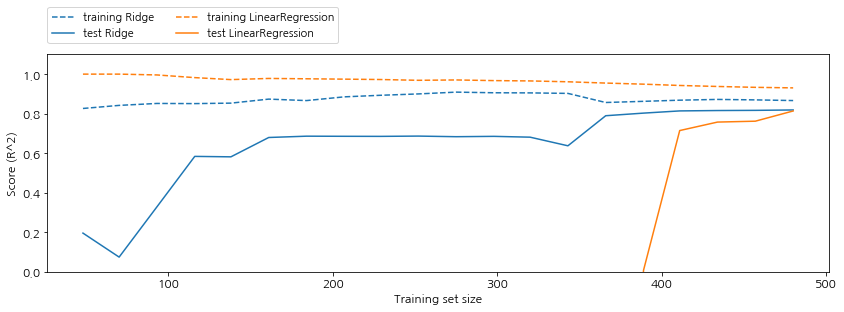

In [38]:
# 훈련 데이터 크기 변화에 땨른 보스턴 주택 가격 학습곡선
mglearn.plots.plot_ridge_n_samples()

### 라쏘

In [39]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso.coef_ != 0)))
print("반복 횟수: {}".format(lasso.n_iter_))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 수: 4
반복 횟수: 34


In [40]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso001.coef_ != 0)))
print("반복 횟수: {}".format(lasso001.n_iter_))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 수: 33
반복 횟수: 1886


In [41]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso00001.coef_ != 0)))
print("반복 횟수: {}".format(lasso00001.n_iter_))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 수: 96
반복 횟수: 41420


Text(0, 0.5, 'Coefficient Value')

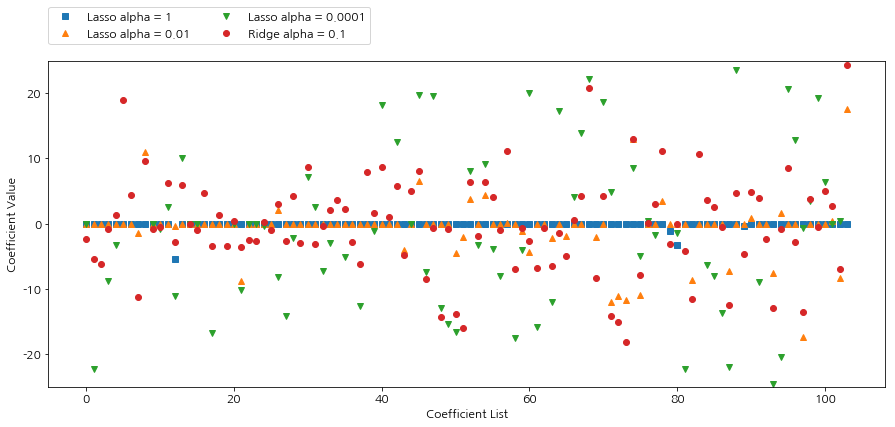

In [42]:
plt.figure(figsize=(15,6))
plt.plot(lasso.coef_, 's', label="Lasso alpha = 1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha = 0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha = 0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha = 0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25,25)
plt.xlabel("Coefficient List")
plt.ylabel("Coefficient Value")

### 분류용 선형 모델

35
[19]


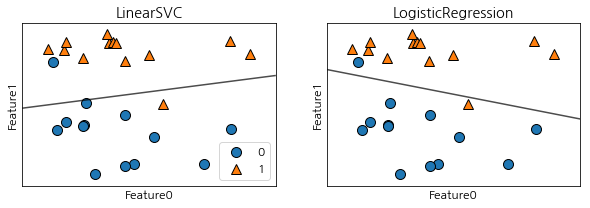

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10,3))
for model, ax in zip([LinearSVC(C=0.01, max_iter=100000), LogisticRegression(solver="lbfgs")], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature0")
    ax.set_ylabel("Feature1")
    print(clf.n_iter_)
axes[0].legend()

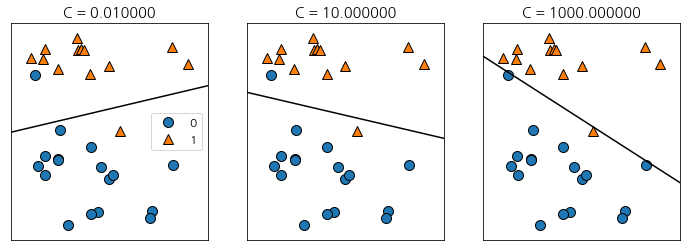

In [44]:
mglearn.plots.plot_linear_svc_regularization()

In [45]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(solver="lbfgs", max_iter=100000).fit(X_train, y_train)
print("훈련 데이터 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 데이터 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 데이터 점수: 0.958
테스트 데이터 점수: 0.958


In [46]:
logreg100 = LogisticRegression(C=100, solver="lbfgs", max_iter=100000).fit(X_train, y_train)
print("훈련 데이터 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 데이터 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 데이터 점수: 0.984
테스트 데이터 점수: 0.965


In [47]:
logreg001 = LogisticRegression(C=0.01, solver="lbfgs", max_iter=100000).fit(X_train, y_train)
print("훈련 데이터 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 데이터 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 데이터 점수: 0.953
테스트 데이터 점수: 0.951


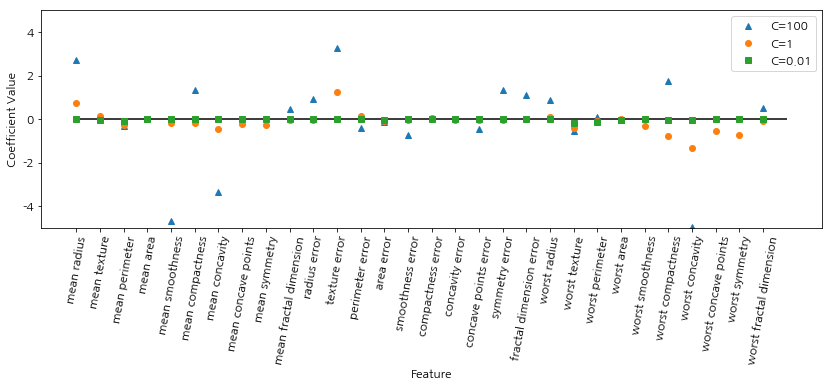

In [48]:
# 규제 매개변수 C 설정에 따른 모델의 계수(Coefficient) 변화
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 's', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=80)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient Value")
plt.legend()

,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.01,0.1,10.0,100.0,1000.0,10000.0,100000.0,1000000.0,10000000.0
train_score,87.323944,90.845070,92.018779,92.957746,95.305164,95.305164,95.305164,95.070423,97.417840,98.356808,98.591549,98.591549,98.591549,98.591549,98.591549
test_score,88.811189,92.307692,91.608392,93.006993,94.405594,95.104895,95.104895,95.104895,96.503497,96.503497,98.601399,97.202797,97.902098,97.202797,97.202797


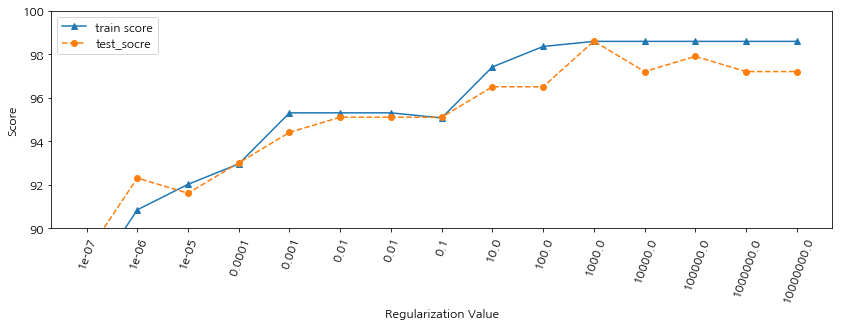

In [49]:
# LogisticRegression의 C값(규제) 변화에 따른 Score 비교
train_score = []
test_score = []
regularization = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-2, 1e-1, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5, 1e+6, 1e+7]

N = len(regularization)
for i in range(N):
    logreg = LogisticRegression(C=regularization[i], solver="lbfgs", max_iter=100000).fit(X_train, y_train)
    train_score.append(logreg.score(X_train, y_train)*100)
    test_score.append(logreg.score(X_test, y_test)*100)
plt.plot(train_score, '^', linestyle='-', label="train score")
plt.plot(test_score, 'o', linestyle='--', label="test_socre")
plt.ylim(90, 100)
plt.xlabel("Regularization Value")
plt.ylabel("Score")
plt.xticks(range(N), regularization, rotation=70)
plt.legend()

score_df = pd.DataFrame(data=[train_score, test_score], index=("train_score", "test_score"), columns=regularization)
display(score_df)

C=0.001 인 L1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 L1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 L1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 L1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 L1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 L1 로지스틱 회귀의 테스트 정확도: 0.98


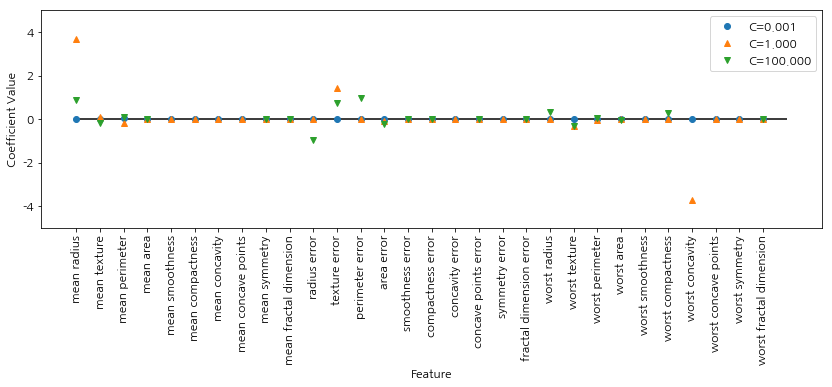

In [50]:
# 모델을 단순화 하기 위해 L1 규제 적용(L1 규제를 지원하는 solver로 변경)
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", max_iter=100000, solver="liblinear").fit(X_train, y_train)
    print("C={:.3f} 인 L1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 L1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient Value")
plt.ylim(-5, 5)
plt.legend()

### 다중 클래스 분류용 선형 모델

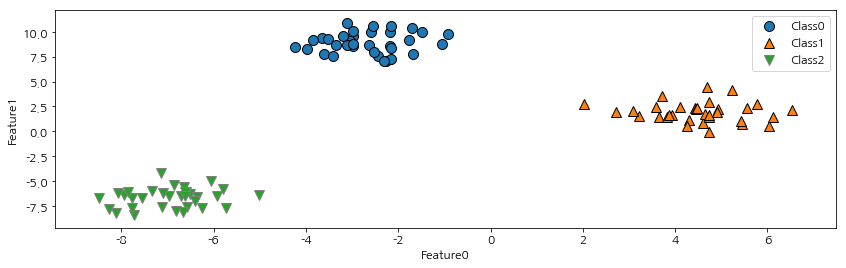

In [51]:
# 분류(classification) 모형의 테스트를 위한 가상 데이터 생성(make_blobs) 함수를 제공
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, random_state=42)          # 3개의 클래스, 2차원 데이터셋, 각 클래스의 데이터는 정규분포(가우시안 분포)를 따름
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature0")
plt.ylabel("Feature1")
plt.legend(["Class0", "Class1", "Class2"])

In [52]:
linear_svm = LinearSVC(max_iter=10000).fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)
display(pd.DataFrame([linear_svm.coef_[:, 0], linear_svm.coef_[:, 1], linear_svm.intercept_], 
                     index=["coef_[0]", "coef_[1]", "intercept_"], columns=["Class0", "Class1", "Class2"] ))

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


,Class0,Class1,Class2
coef_[0],-0.174920,0.476214,-0.189140
coef_[1],0.231403,-0.069375,-0.204004
intercept_,-1.077450,0.131405,-0.086049


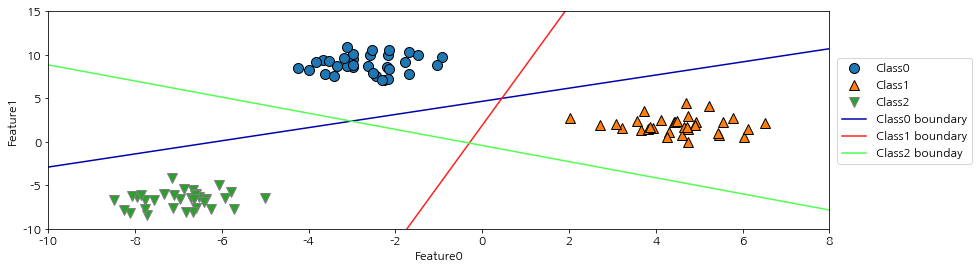

In [53]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature0")
plt.ylabel("Feature1")
plt.legend(["Class0", "Class1", "Class2", "Class0 boundary", "Class1 boundary", "Class2 bounday"], loc=(1.01, 0.3))

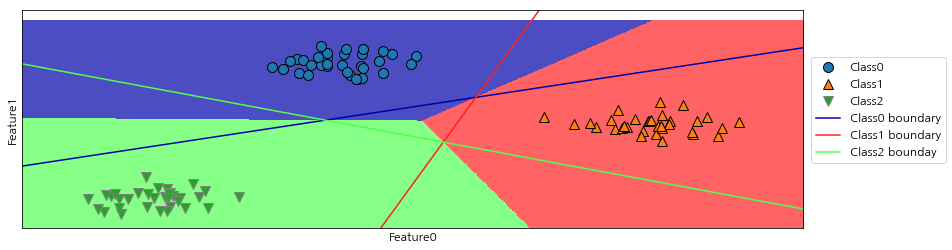

In [54]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature0")
plt.ylabel("Feature1")
plt.legend(["Class0", "Class1", "Class2", "Class0 boundary", "Class1 boundary", "Class2 bounday"], loc=(1.01, 0.3))

## 2.3.4 나이브 베이즈 분류기

In [55]:
X = np.array([[0, 1, 0, 1],
             [1, 0, 1, 1],
             [0, 0, 0, 1],
             [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [56]:
# BernoulliNB 분류기에서 클래스별로 0이 아닌 원소를 세는 과정
counts = {}
for label in np.unique(y):
    # 특성마다 1이 나타난 회수를 센다(클래스의 값이 0과 1 뿐이므로, 1이 나타난 회수를 세는 것은 특성의 값을 모두 더하는 것과 같음)
    counts[label] = X[y == label].sum(axis=0)
print("특성 카운트:\n{}".format(counts))

특성 카운트:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


## 2.3.5 결정 트리

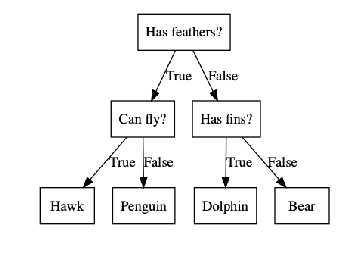

In [57]:
mglearn.plots.plot_animal_tree()
# brew install graphviz (or pip3 install graphviz)

In [58]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [59]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


In [60]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
               feature_names=cancer.feature_names,
               impurity=False, filled=True)

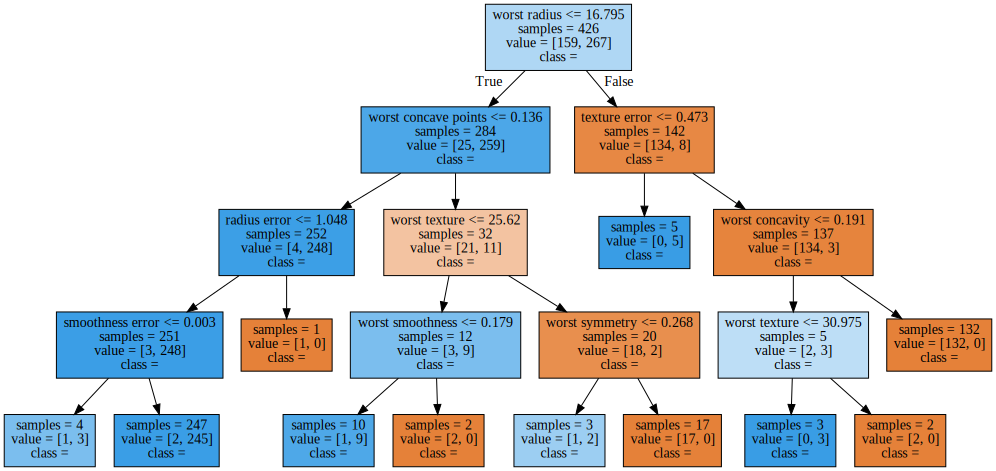

In [61]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# 주피터 노트북이 아닌 경우, graphviz.Source()의 결과를 pdf, png 등의 파일로 저장하기
# dot = graphviz.Source(dot_graph)
# dot.format='png'
# dot.render(filename='tree.png')

In [62]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


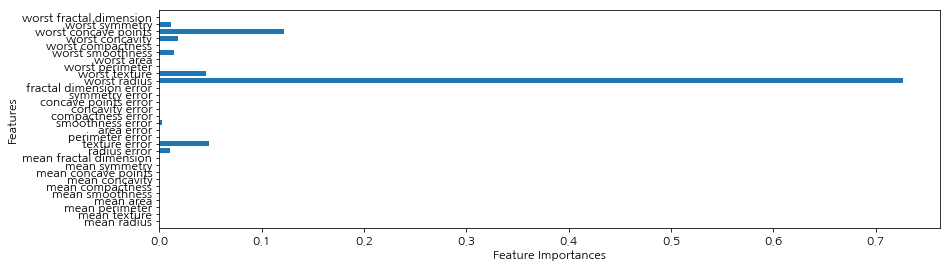

In [63]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature Importances")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


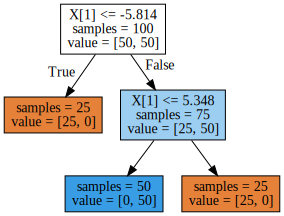

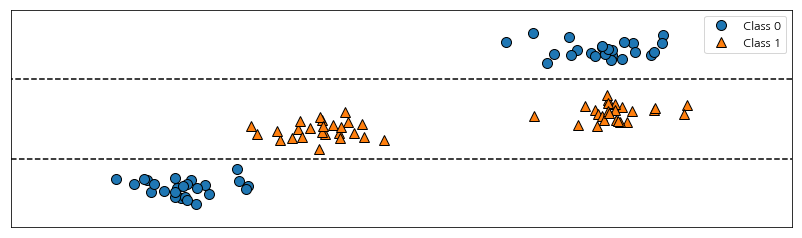

In [64]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price ($/Mbytes)')

/usr/local/lib/python3.7/site-packages/matplotlib/mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
  MathTextWarning)


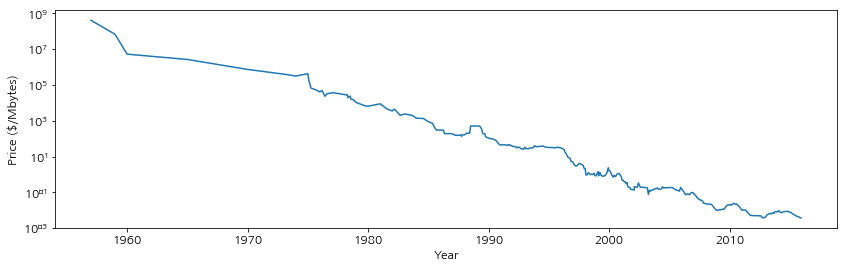

In [65]:
# 컴퓨터 메모리 가격 동향
import os
import pandas as pd
ram_prices =  pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price ($/Mbytes)")

In [66]:
# 2000년 전까지의 데이터로부터 2000년 이후 가격 예측
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

/usr/local/lib/python3.7/site-packages/matplotlib/mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
  MathTextWarning)


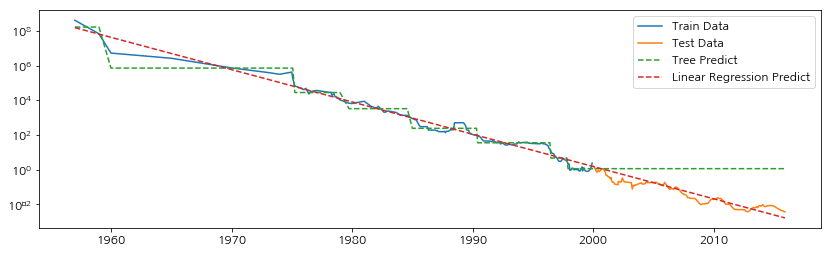

In [67]:
plt.semilogy(data_train.date, data_train.price, label="Train Data")
plt.semilogy(data_test.date, data_test.price, label="Test Data")
plt.semilogy(ram_prices.date, price_tree, linestyle='--', label="Tree Predict")
plt.semilogy(ram_prices.date, price_lr, linestyle='--', label="Linear Regression Predict")
plt.legend()

## 2.3.6 결정 트리의 앙상블

### 랜덤 포레스트

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

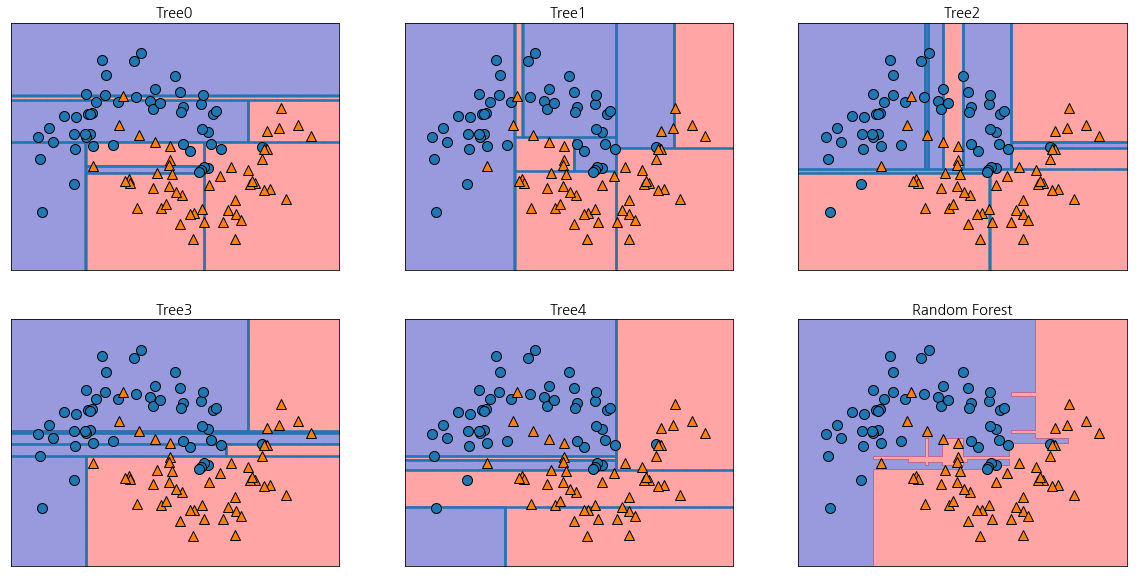

In [69]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree{}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [70]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


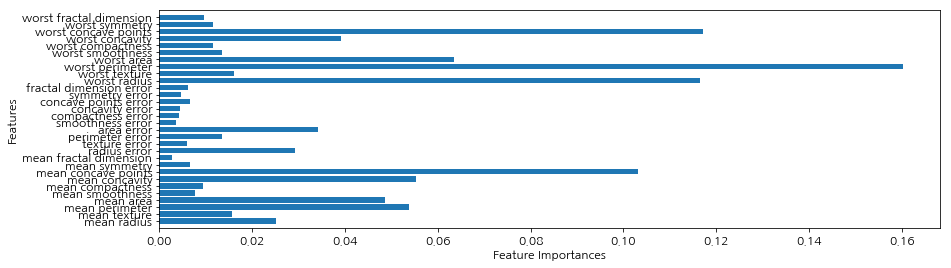

In [71]:
plot_feature_importances_cancer(forest)

### 그래디언트 부스팅 회귀 트리

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.958


In [73]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


In [74]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


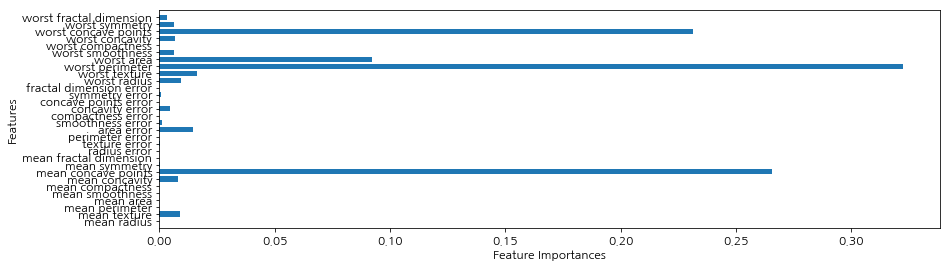

In [75]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

## 2.3.7 커널 서포트 벡터 머신

Text(0, 0.5, 'Feature1')

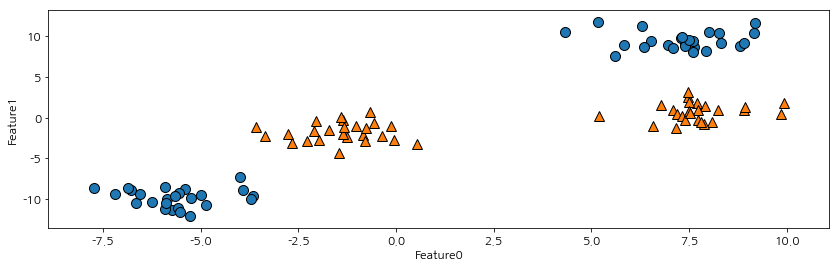

In [76]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature0")
plt.ylabel("Feature1")

Text(0, 0.5, 'Feature1')

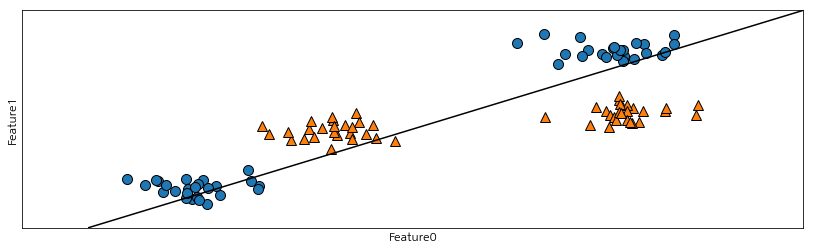

In [77]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=10000).fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature0")
plt.ylabel("Feature1")

Text(0.5, 0, 'Feature1 ** 2')

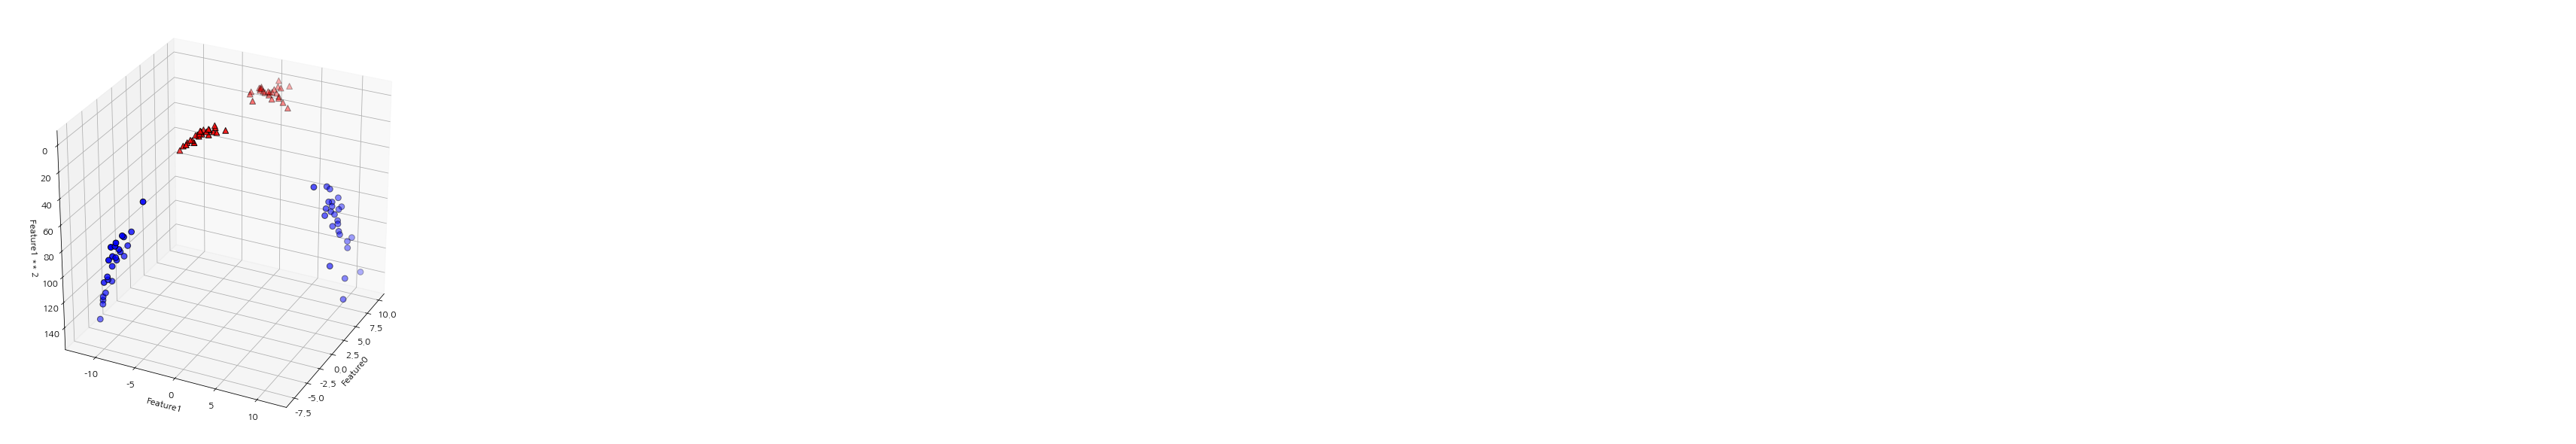

In [78]:
# 특성1을 제곱하여 새로운 특성을 추가
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure(figsize=(8,8))

ax = Axes3D(figure, elev=-152, azim=-26)

mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("Feature0")
ax.set_ylabel("Feature1")
ax.set_zlabel("Feature1 ** 2")

Text(0.5, 0, 'Feature1 ** 2')

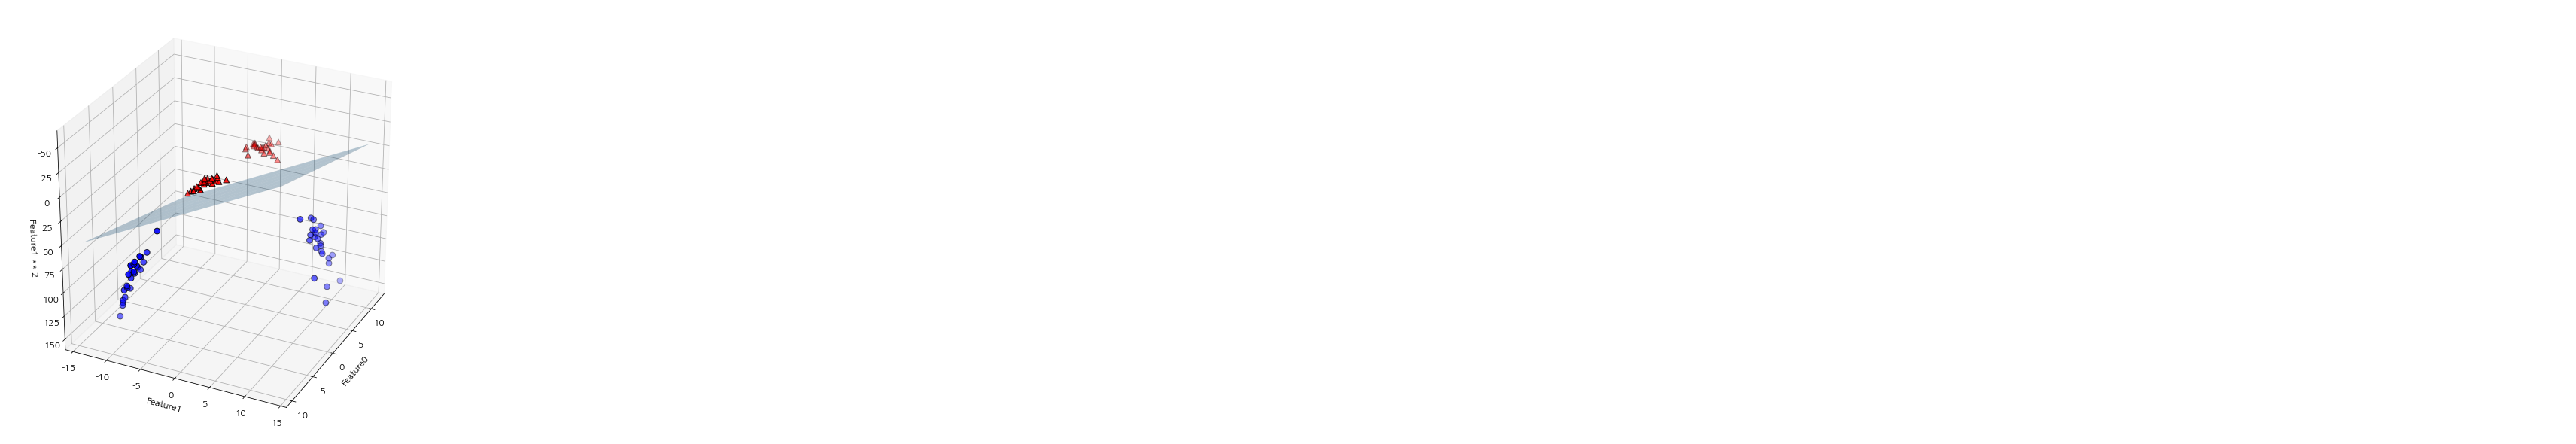

In [79]:
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d

linear_svm_3d = LinearSVC(max_iter=10000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure(figsize=(8,8))
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

mask = y == 0
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("Feature0")
ax.set_ylabel("Feature1")
ax.set_zlabel("Feature1 ** 2")

Text(0, 0.5, 'Feature1')

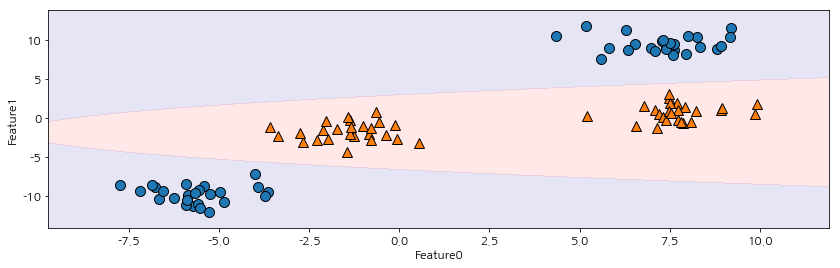

In [80]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.1)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature0")
plt.ylabel("Feature1")

Text(0, 0.5, 'Feature1')

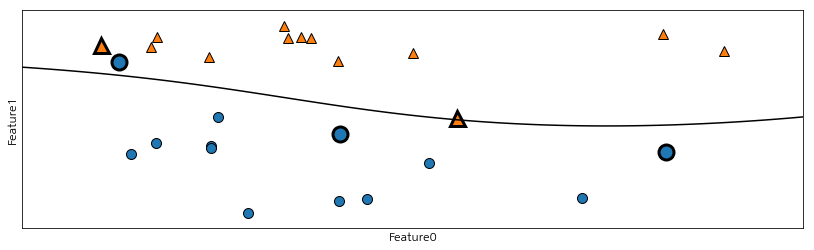

In [81]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)

mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0

mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature0")
plt.ylabel("Feature1")

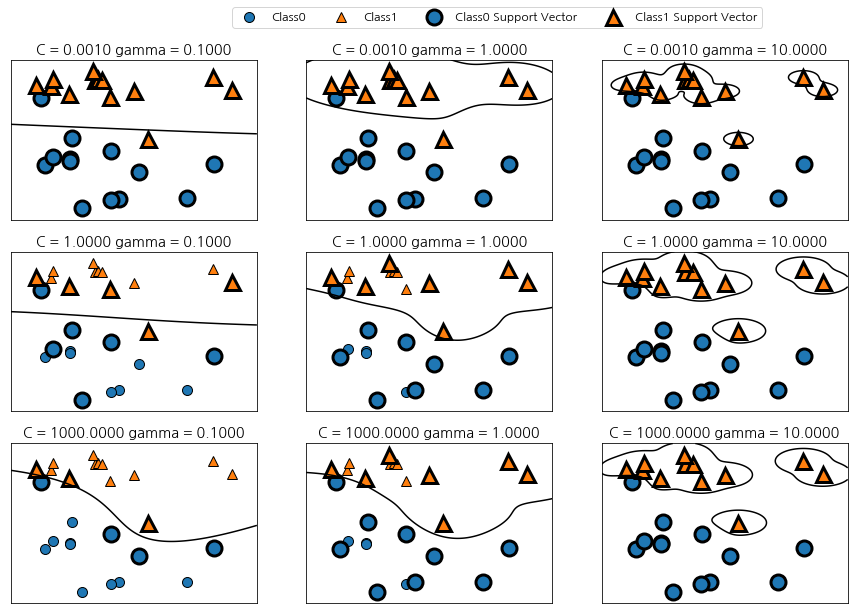

In [82]:
fig, axes = plt.subplots(3, 3, figsize=(15,10))

for ax, C in zip(axes, [-3, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["Class0", "Class1", "Class0 Support Vector", "Class1 Support Vector"], ncol=4, loc=(.9, 1.2))

In [83]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC(gamma='auto').fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.629


Text(0, 0.5, 'Feature Value(log scale)')

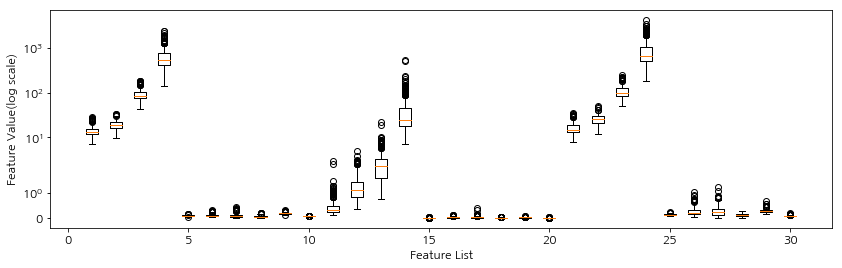

In [84]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("Feature List")
plt.ylabel("Feature Value(log scale)")

In [85]:
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최소값:\n{}".format(X_train_scaled.min(axis=0)))
print("특성별 최대값:\n{}".format(X_train_scaled.max(axis=0)))

특성별 최소값:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최대값:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [86]:
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC(gamma='auto').fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.948
테스트 세트 정확도: 0.951


In [87]:
svc = SVC(gamma=0.01, C=1000).fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.986
테스트 세트 정확도: 0.979


## 2.3.8 신경망(딥러닝)

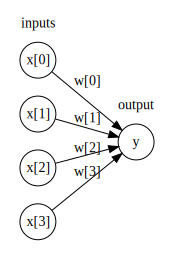

In [88]:
display(mglearn.plots.plot_logistic_regression_graph())

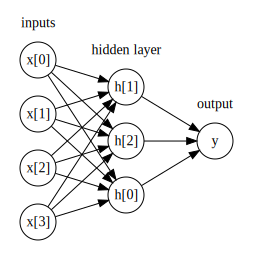

In [89]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x), tanh(x)')

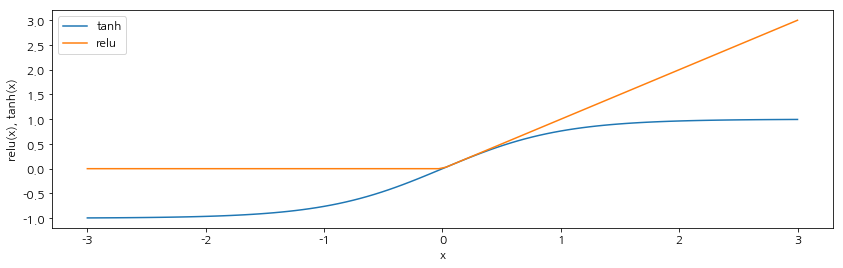

In [90]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

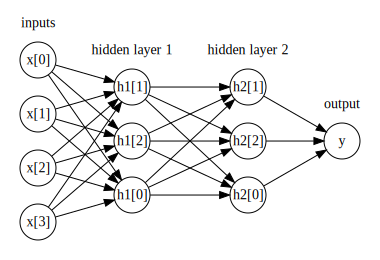

In [91]:
display(mglearn.plots.plot_two_hidden_layer_graph())

Text(0, 0.5, 'Feature1')

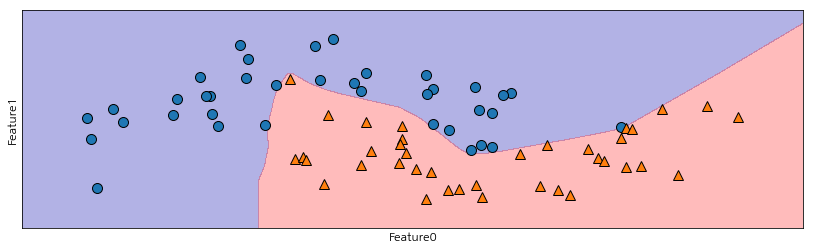

In [92]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature0")
plt.ylabel("Feature1")

Text(0, 0.5, 'Feature1')

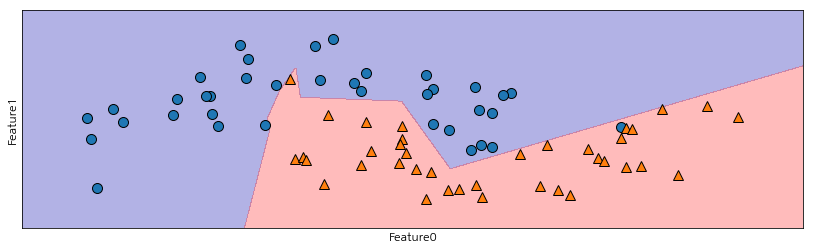

In [93]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature0")
plt.ylabel("Feature1")

Text(0, 0.5, 'Feature1')

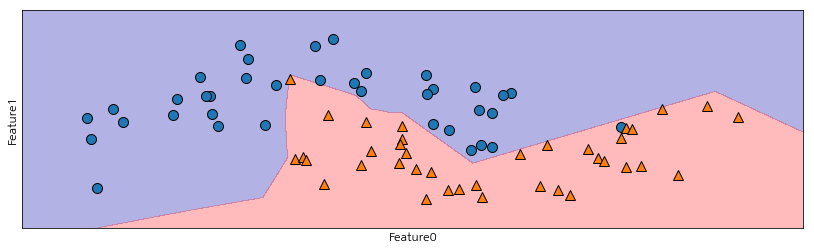

In [94]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature0")
plt.ylabel("Feature1")

Text(0, 0.5, 'Feature1')

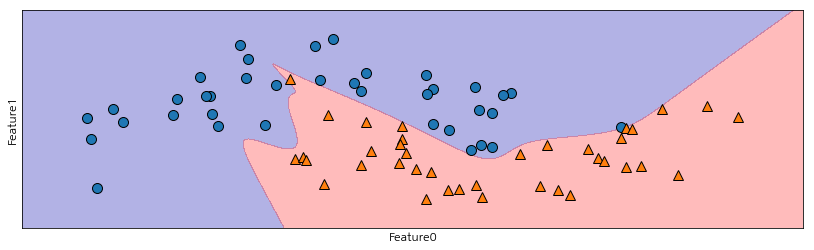

In [95]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, activation='tanh', hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature0")
plt.ylabel("Feature1")

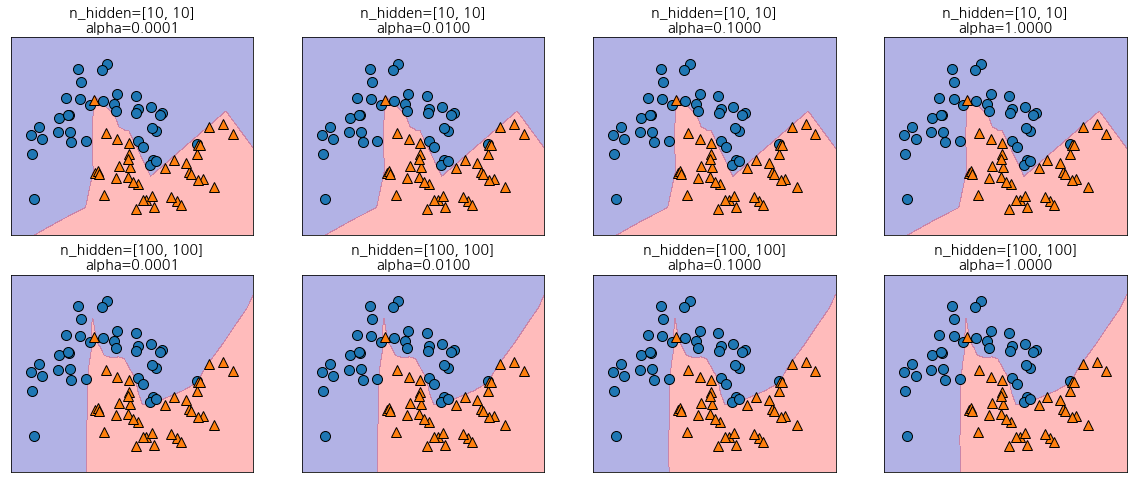

In [96]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes])
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

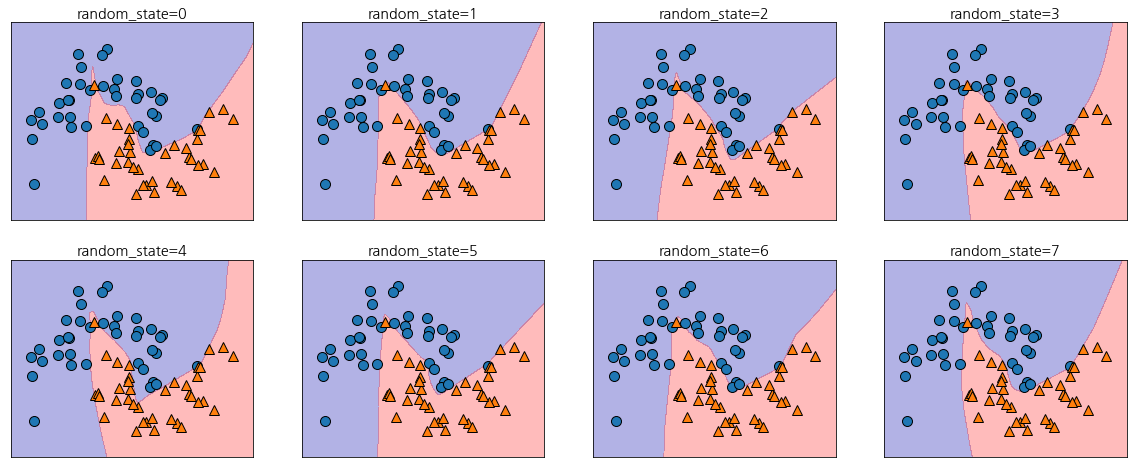

In [97]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
    ax.set_title("random_state={}".format(mlp.random_state))

In [98]:
print("유방암 데이터의 특성별 최대값:\n{}".format(cancer.data.max(axis=0)))

유방암 데이터의 특성별 최대값:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [99]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.939
테스트 세트 정확도: 0.916


In [100]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(max_iter=10000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


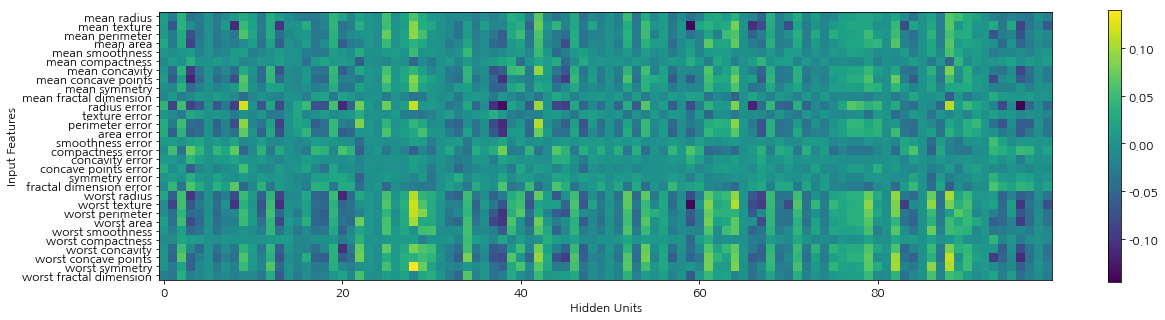

In [101]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='None', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Hidden Units")
plt.ylabel("Input Features")
plt.colorbar()

## 2.4 분류 예측의 불확실성 추정

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
y_named = np.array(["blue", "red"])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

### 2.4.1 결정 함수

In [103]:
print("X_test.shape: {}".format(X_test.shape))
print("결정 함수 결과 형태: {}".format(gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
결정 함수 결과 형태: (25,)


In [104]:
print("결정 함수:\n{}".format(gbrt.decision_function(X_test)))

결정 함수:
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106
 -7.69097177  4.11001634  1.10753883  3.40782247 -6.46262729  4.28986668
  3.90156371 -1.20031192  3.66166106 -4.17231209 -1.23010022 -3.91576275
  4.03602808  4.11001634  4.11001634  0.65708962  2.69826291 -2.65673325
 -1.86776597]


In [105]:
print("임계치와 결정 함수 결과 비교:\n{}".format(gbrt.decision_function(X_test) > 0))
print("예측:\n{}".format(gbrt.predict(X_test)))

임계치와 결정 함수 결과 비교:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [106]:
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
pred = gbrt.classes_[greater_zero]
print("pred는 예측 결과와 같다: {}".format(np.all(pred == gbrt.predict(X_test))))

pred는 예측 결과와 같다: True


In [107]:
decision_function = gbrt.decision_function(X_test)
print("결정 함수 최소값: {:.3f}, 최대값: {:.3f}".format(np.min(decision_function), np.max(decision_function)))

결정 함수 최소값: -7.691, 최대값: 4.290


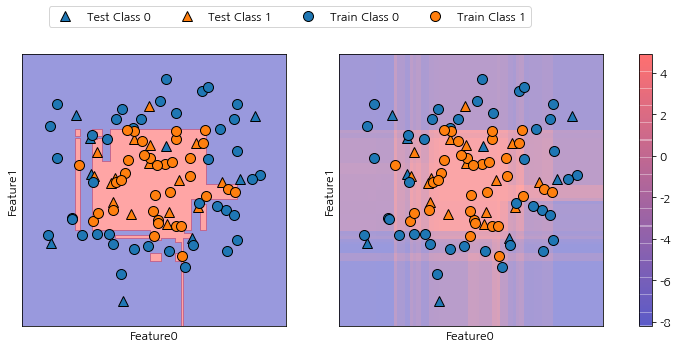

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature0")
    ax.set_ylabel("Feature1")

cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test Class 0", "Test Class 1", "Train Class 0", "Train Class 1"], ncol=4, loc=(.1, 1.1))

### 2.4.2 예측 확률

In [109]:
print("확률 갑의 형태: {}".format(gbrt.predict_proba(X_test).shape))
print("예측 확류:\n{}",format(gbrt.predict_proba(X_test)[:6]))

확률 갑의 형태: (25, 2)
예측 확류:
{} [[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


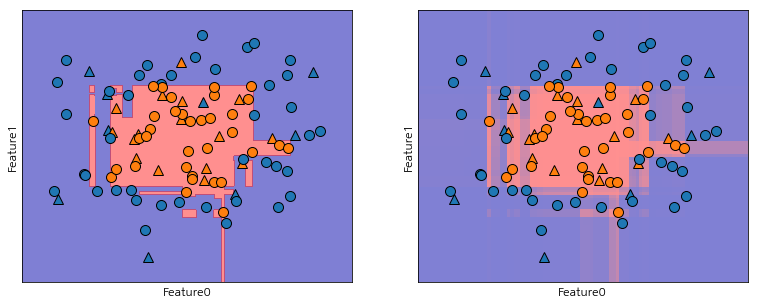

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=0.5, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=0.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature0")
    ax.set_ylabel("Feature1")

### 2.4.3 다중 분류에서의 불확실성

In [111]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

print("결정 함수의 결과 형태 {}".format(gbrt.decision_function(X_test).shape))
print("결정 함수 결과:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

결정 함수의 결과 형태 (38, 3)
결정 함수 결과:
[[-0.52931069  1.46560359 -0.50448467]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52379401 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53107259  1.28190451  0.21510024]
 [ 1.51154215 -0.49561142 -0.50310736]]


In [112]:
print("가장 큰 결정 함수의 인덱스:\n{}".format(np.argmax(gbrt.decision_function(X_test), axis=1)))
print("예측:\n{}".format(gbrt.predict(X_test)))

가장 큰 결정 함수의 인덱스:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [113]:
print("예측 확률:\n{}".format(gbrt.predict_proba(X_test)[:6]))
print("합: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

예측 확률:
[[0.10664722 0.7840248  0.10932798]
 [0.78880668 0.10599243 0.10520089]
 [0.10231173 0.10822274 0.78946553]
 [0.10664722 0.7840248  0.10932798]
 [0.10825347 0.66344934 0.22829719]
 [0.78880668 0.10599243 0.10520089]]
합: [1. 1. 1. 1. 1. 1.]


In [114]:
print(("가장 큰 예측 확률의 인덱스:\n{}".format(np.argmax(gbrt.predict_proba(X_test), axis=1))))
print("예측: {}".format(gbrt.predict(X_test)))

가장 큰 예측 확률의 인덱스:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [115]:
logreg = LogisticRegression(solver='lbfgs', max_iter=10000, multi_class='auto')

named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)

print("훈련 데이터에 있는 클래스 종류: {}".format(logreg.classes_))
print("예측: {}".format(logreg.predict(X_test)[:10]))

argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("가장 큰 결정 함수의 인덱스: {}".format(argmax_dec_func[:10]))
print("인덱스를 클래스에 연결: {}".format(logreg.classes_[argmax_dec_func][:10]))

훈련 데이터에 있는 클래스 종류: ['setosa' 'versicolor' 'virginica']
예측: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수의 인덱스: [1 0 2 1 1 0 1 2 1 1]
인덱스를 클래스에 연결: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
